In [1]:
import numpy as np
# TO STORE AND PROCESS DATA IN DATAFRAME
import pandas as pd
# BASIC VISUALIZATION PACKAGE
import matplotlib.pyplot as plt
# ADVANCED PLOTING
import seaborn as seabornInstance
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
# STATS
from sklearn import datasets, metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#2015 data
finaldf = pd.read_csv('2015.csv')
usecols = ['Rank','Country','Score','GDP','Support',
'Health','Freedom','Generosity','Corruption']
finaldf.drop(['Region','Standard Error', 'Dystopia Residual'],axis=1,inplace=True)
finaldf.columns = ['Country','Rank','Score','Support',
'GDP','Health',
'Freedom','Generosity','Corruption']
finaldf['Year'] = 2015 #add year column
finaldf.head()


,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [11]:
X = finaldf.iloc[: , 4:5].values
#print(X)
y = finaldf.iloc[: , 2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
lr = LinearRegression()
x2 = lr.fit(X_train, y_train)
x2.predict(X_test)

array([5.70192909, 6.24312196, 4.66490481, 3.56419023, 6.38473362,
       5.90503921, 5.68522031, 6.23838887, 4.71728651, 6.16504178,
       5.42137409, 5.34967882, 6.29521777, 4.79003005, 6.13664321,
       4.59314601, 3.55539112, 5.55564786, 4.95479893, 3.75726238,
       5.75551789, 5.009436  , 6.18826253, 6.14537879, 3.569781  ,
       5.87587827, 5.50872987, 6.21383395, 3.61803315, 5.35673081,
       4.40734821, 6.06745743])

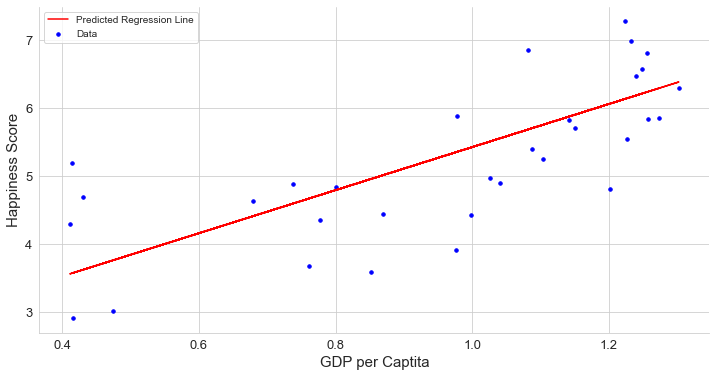

In [12]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("GDP per Captita", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

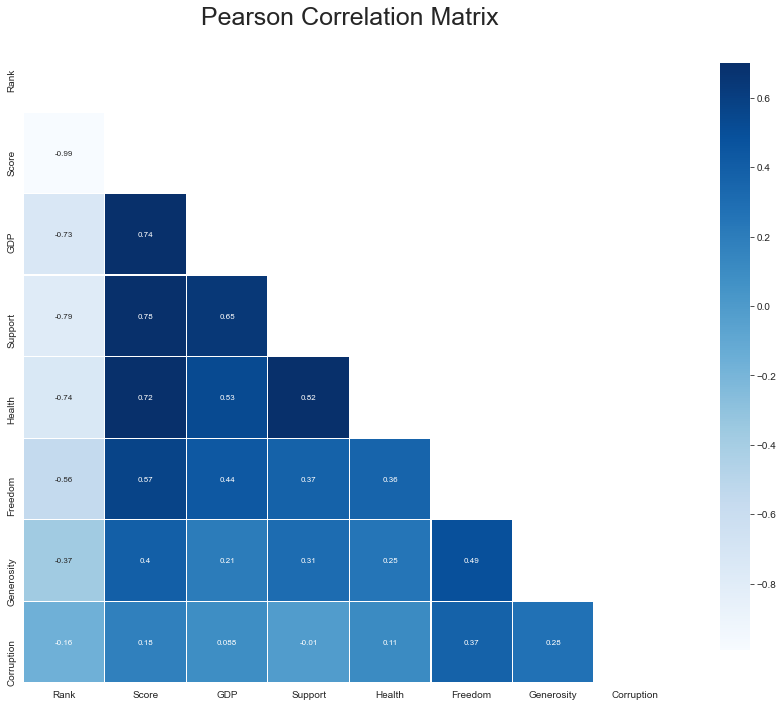

In [13]:
mask = np.zeros_like(finaldf[usecols].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)
seabornInstance.heatmap(finaldf[usecols].corr(),
 linewidths=0.25,vmax=0.7,square=True,cmap="Blues", 
 linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [15]:
train_data, test_data = train_test_split(finaldf, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['GDP'],
 dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Score'], dtype = pd.Series)
lr.fit(X_train, y_train)
X_test = np.array(test_data['GDP'], 
 dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Score'], dtype = pd.Series)
pred = lr.predict(X_test)
pred

array([5.41797287, 6.37040521, 5.92564311, 6.00215873, 5.32724634,
       5.74120307, 6.27512276, 6.21719295, 5.50329864, 4.80458073,
       6.07448047, 4.14107327, 3.65527756, 5.87254079, 5.15864648,
       3.59577883, 5.58331418, 5.44751103, 3.60944664, 4.59651618,
       5.47795435, 5.36894373, 5.60636541, 5.12796179, 4.68138938,
       5.11878957, 6.33211723, 5.7731248 , 5.37995643, 6.05951527,
       6.34524196, 5.41423157])

In [17]:
evaluation = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (training)': [],
                          'Adjusted R-squared (training)': [],
                          'R-squared (test)':[],
                          'Adjusted R-squared(test)':[],
                           '5-Fold Cross Validation':[]
                        })
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,finaldf[['GDP']],finaldf['Score'],cv=5).mean(),'.3f'))
print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
print('Happiness score = ',np.round(lr.intercept_,4),
 '+',np.round(lr.coef_,4),'* GDP')
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
print(pd.DataFrame(evaluation))

Average Score for Test Data: 5.528
Intercept: 2.3546931281404024
Coefficient: [3.01717727]
Happiness score =  2.3547 + [3.0172] * GDP
                      Model Details  Root Mean Squared Error (RMSE)  \
0  Simple Linear Regression       -                           0.774   

   R-squared (training) Adjusted R-squared (training)  R-squared (test)  \
0                  0.54                             -             0.564   

  Adjusted R-squared(test)  5-Fold Cross Validation  
0                        -                  -11.881  


In [19]:
# MULTIPLE LINEAR REGRESSION 1
train_data_dm,test_data_dm = train_test_split(finaldf,train_size = 0.8,random_state=3)
independent_var = ['GDP','Health','Freedom','Support','Generosity','Corruption']
complex_model_1 = LinearRegression()
complex_model_1.fit(train_data_dm[independent_var],train_data_dm['Score'])
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))
print('Happiness score = ',np.round(complex_model_1.intercept_,4),
 '+',np.round(complex_model_1.coef_[0],4),'∗ Support',
 '+',np.round(complex_model_1.coef_[1],4),'* GDP', 
 '+',np.round(complex_model_1.coef_[2],4),'* Health',
 '+',np.round(complex_model_1.coef_[3],4),'* Freedom',
 '+',np.round(complex_model_1.coef_[4],4),'* Generosity',
 '+',np.round(complex_model_1.coef_[5],4),'* Corrption')
pred = complex_model_1.predict(test_data_dm[independent_var])
print(pred)

Intercept: 1.828068004877085
Coefficients: [1.4529232  0.79787549 1.35410705 0.94963075 0.65080418 0.3888729 ]
Happiness score =  1.8281 + 1.4529 ∗ Support + 0.7979 * GDP + 1.3541 * Health + 0.9496 * Freedom + 0.6508 * Generosity + 0.3889 * Corrption
[4.89739695 7.13301893 6.07699058 6.30781223 5.73736939 5.83881226
 6.77291587 6.88890313 5.5165981  4.74870989 5.94216198 4.27309074
 4.02897828 6.55770689 5.09141832 3.37819185 6.12548592 5.24850278
 2.92817528 4.09298969 5.48956863 5.55135612 5.30924402 4.80795212
 4.34121745 4.66305978 6.90703206 4.72429142 4.47691571 6.06350295
 6.98152574 4.39649724]
